Write a function $$f(x)=\frac{x^3-3x^2-1}{2x^2-3x-1}$$
Pick 11 points equally spaced between 0 and 1.5, calculate a table of values and set up a linear interpolation.

What is the interpolated value at 1.125.

1.853922550367669 1.8294491525423728


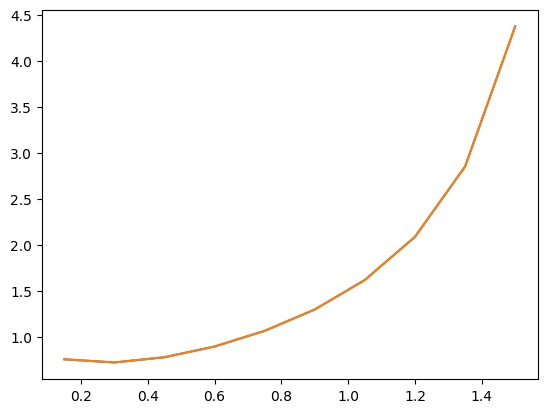

array([0.15, 0.45, 0.75, 1.05, 1.35])

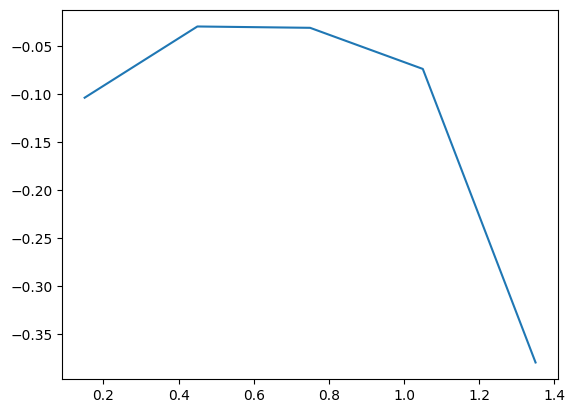

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**3-3*x**2-1)/(2*x**2-3*x-1)

xl=np.linspace(0,1.5,11)
print(np.interp(1.125,xl,f(xl)),f(1.125))

#plt.plot(xl,f(xl))

plt.plot(xl[1::1],f(xl[1::1]))
plt.plot(xl[1::1],np.interp(xl[1::1],xl[::1],f(xl[::1])))
plt.show()
plt.plot(xl[1::2],f(xl[1::2])-np.interp(xl[1::2],xl[::2],f(xl[::2])))
xl[1::2]

Write a function $$f(x)=\frac{x^3-3x^2-1}{2x^2-3x-1}$$
Set up a 21 degree chebtshev polynomial interpolation between 0 and 1.5

What is the interpolated value at 1.125?


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebpts1
from scipy.interpolate import BarycentricInterpolator

xl=(chebpts1(21)+1)/2*1.5

def f(x):
    return (x**3-3*x**2-1)/(2*x**2-3*x-1)

interp=BarycentricInterpolator(xl,f(xl))

print(interp(1.125),f(1.125))

1.8294492211335982 1.8294491525423728


In [39]:
(chebpts1(21)+1)/2*1.5

array([0.00209715, 0.01880407, 0.05184469, 0.10048095, 0.16362639,
       0.23987045, 0.32750996, 0.4245872 , 0.52893362, 0.6382183 ,
       0.75      , 0.8617817 , 0.97106638, 1.0754128 , 1.17249004,
       1.26012955, 1.33637361, 1.39951905, 1.44815531, 1.48119593,
       1.49790285])

In [35]:
from numpy.polynomial.chebyshev import Chebyshev as C
coefs=C.interpolate(f,21,domain=[0,1.5])
coefs(1.125)

np.float64(1.8294491714044736)

In [26]:
xl

array([0.00209715, 0.01880407, 0.05184469, 0.10048095, 0.16362639,
       0.23987045, 0.32750996, 0.4245872 , 0.52893362, 0.6382183 ,
       0.75      , 0.8617817 , 0.97106638, 1.0754128 , 1.17249004,
       1.26012955, 1.33637361, 1.39951905, 1.44815531, 1.48119593,
       1.49790285])

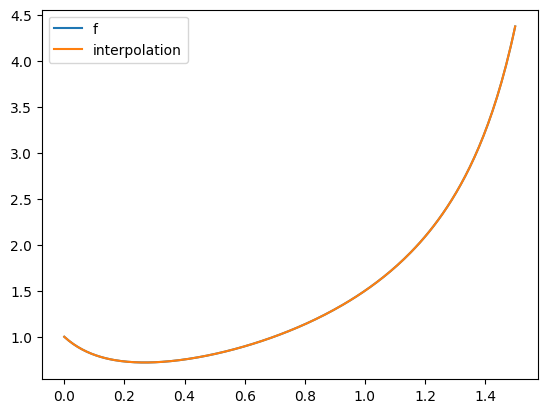

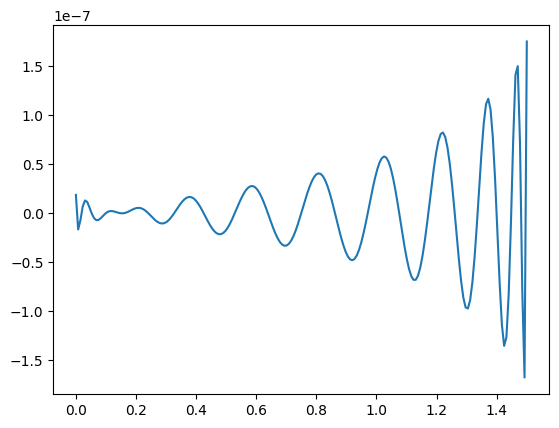

In [27]:
x2=np.linspace(0,1.5,200)
plt.plot(x2,f(x2),label='f')
plt.plot(x2,interp(x2),label='interpolation')
plt.legend()
plt.show()
plt.plot(x2,f(x2)-interp(x2))


# Mapping range

Consider the same function as we have been using:
$$f(x)=\frac{x^3-3x^2-1}{2x^2-3x-1}$$
We have been using the range between 0 and 1.5.

Set up a map function $$x'(x)$$ with the conditions $x'(0)=-1.0, x'(1.5)=1.$ and then define $$g(x')\equiv f(x).$$  What is g(0.75)?

















2.618291884816754


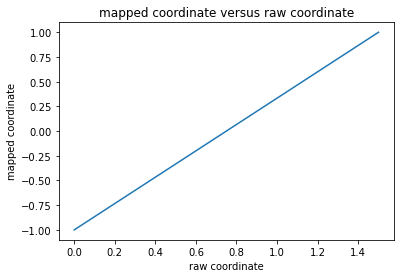

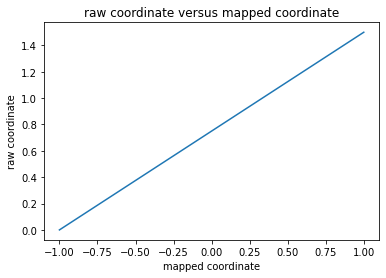

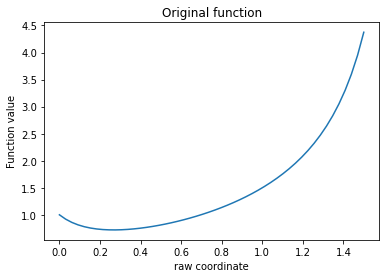

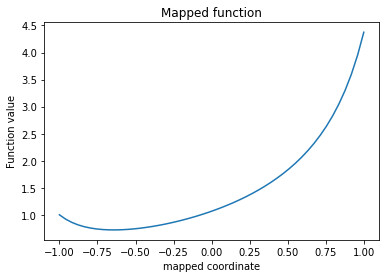

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator


def f(x):
    return (x**3-3*x**2-1)/(2*x**2-3*x-1)

def xp(x):
    return x*2.0/1.5-1.0  #map 0,1.5 onto -1,-1

def xm(x):
    return (1+x)*1.5/2  #map -1,1 onto 0,1.5

def g(xp): #xp is on -1,1, f is on 0,1.5
    return f(xm(xp))

print(g(0.75))

xlist=np.linspace(0,1.5)
xplist=np.linspace(-1,1)
plt.plot(xlist,xp(xlist))
plt.title('mapped coordinate versus raw coordinate')
plt.xlabel('raw coordinate')
plt.ylabel('mapped coordinate')
plt.show()
plt.plot(xplist,xm(xplist))
plt.title('raw coordinate versus mapped coordinate')
plt.ylabel('raw coordinate')
plt.xlabel('mapped coordinate')
plt.show()
plt.plot(xlist,f(xlist))
plt.title('Original function')
plt.xlabel('raw coordinate')
plt.ylabel('Function value')
plt.show()
plt.plot(xplist,g(xplist))
plt.title('Mapped function')
plt.xlabel('mapped coordinate')
plt.ylabel('Function value')
plt.show()


In [3]:
import numpy as np
from numpy.polynomial import Polynomial as P

In [10]:
abc=P((0,1))
a=P([0,1],domain=(0,10))
a(0)

np.float64(-1.0)

In [11]:
from scipy.interpolate import BarycentricInterpolator

In [12]:
help(BarycentricInterpolator)

Help on class BarycentricInterpolator in module scipy.interpolate._polyint:

class BarycentricInterpolator(_Interpolator1DWithDerivatives)
 |  BarycentricInterpolator(xi, yi=None, axis=0, *, wi=None, random_state=None)
 |  
 |  Interpolating polynomial for a set of points.
 |  
 |  Constructs a polynomial that passes through a given set of points.
 |  Allows evaluation of the polynomial and all its derivatives,
 |  efficient changing of the y-values to be interpolated,
 |  and updating by adding more x- and y-values.
 |  
 |  For reasons of numerical stability, this function does not compute
 |  the coefficients of the polynomial.
 |  
 |  The values `yi` need to be provided before the function is
 |  evaluated, but none of the preprocessing depends on them, so rapid
 |  updates are possible.
 |  
 |  Parameters
 |  ----------
 |  xi : array_like, shape (npoints, )
 |      1-D array of x coordinates of the points the polynomial
 |      should pass through
 |  yi : array_like, shape (..